## Análisis Exploratorio de Datos Univariado

En este cuaderno de python exploraremos dos variables, una numerica y otra categorica, del dataset Telco-Customer Chur.

fuente: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [27]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Importamos el dataset de telco para analisar el churn

df_customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [30]:
#Revisamos la informacion del dataset

print(df_customer_churn.describe())

#Revsiamos las columnas del dataset
print(df_customer_churn.info())

# Análisis de valores nulos
print(df_customer_churn.isnull().sum())

# Revisamos los primeros 5 registros
df_customer_churn.head

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

### EDA Univariado Variable Númerica

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


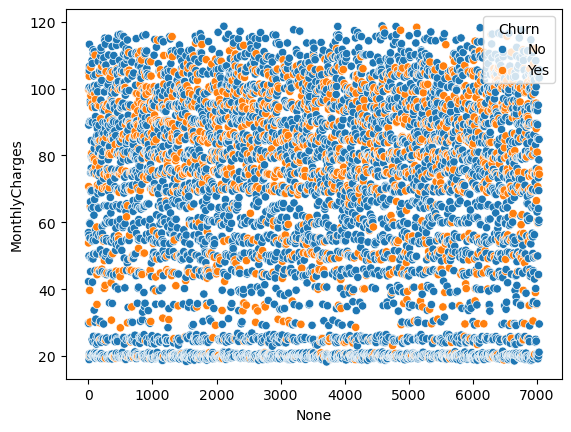

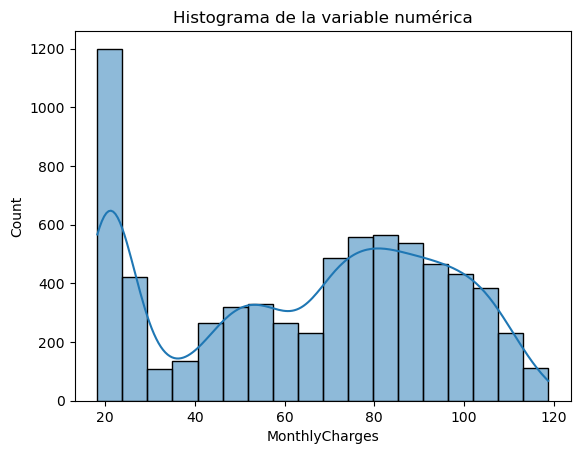

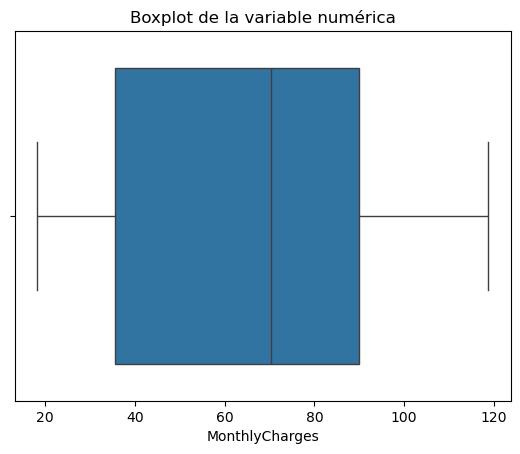

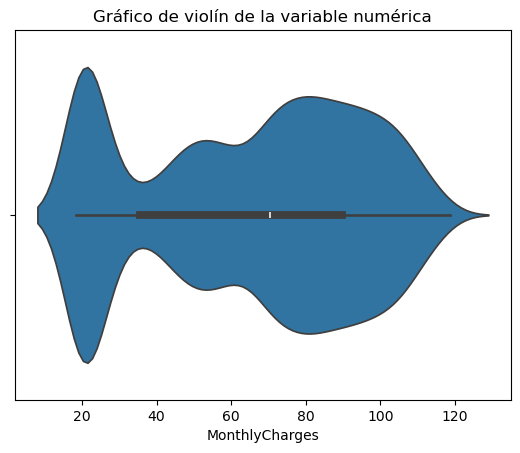

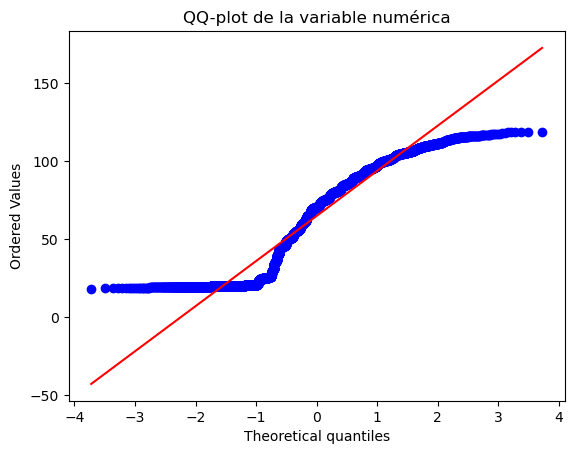

Asimetría: -0.22052443394398033
Kurtosis: -1.2572596945495056
Outliers: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [32]:
# 1. Estadísticos descriptivos básicos
print(df_customer_churn['MonthlyCharges'].describe())

# 2. Visualización de la distribución
sns.scatterplot(x = df_customer_churn.index, y = df_customer_churn['MonthlyCharges'],hue=df_customer_churn['Churn'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df_customer_churn['MonthlyCharges'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df_customer_churn['MonthlyCharges'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df_customer_churn['MonthlyCharges'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df_customer_churn['MonthlyCharges'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df_customer_churn['MonthlyCharges'].skew())
print('Kurtosis:', df_customer_churn['MonthlyCharges'].kurt())

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df_customer_churn['MonthlyCharges'].quantile(0.25)
Q3 = df_customer_churn['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_customer_churn[(df_customer_churn['MonthlyCharges'] < Q1 - 1.5*IQR) | (df_customer_churn['MonthlyCharges'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)

**Análisis**

La variable MontlyCharges muestra el valor mensual que los clientes pagan por su servicio. Es importante porque es el costo que el cliente percibe y puede determinar qué tan dispuesto está a seguir con su línea.

Conclusiones:

Tenemos 7,030 registros completos sin nulos. Los valores can desde $18.25 hasta $118.75 y la media es $60.75

En el primer grafico encontramos que la variable no está ordenada por el índice, data la gran cantidad de puntos es difícil identificar información en el gráfico y el histograma agrupado nos será más útil.

El histograma nos muestra que la variable no es simétrica y tiene un rango de datos dominante entre los primeros valores, presumiblemente los planes más económicos. Con esta gráfica comenzamos a pensar que la variable no tiene un comportamiento normal.

En el boxplot no se identifican valores atípicos u outliers.

El grafico de violín nos da conclusiones similares al histograma.

Al realizar el grafico QQ plot vemos que no se ajusta a la línea por y claramente vemos el efecto de la mayor existencia de los planes baratos. Esto nos hace concluir que la variable no tiene un comportamiento normal. 

Finalmente, el coeficiente de asimetría negativo indica la cola a la izquierda. También, esto afecta la curtosis que es negativa lo cual indica que es una distribución más plana que la normal. Por último, al utilizar el rango Inter cuantil para identificar outliers no encontramos ninguno.

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: count, dtype: float64


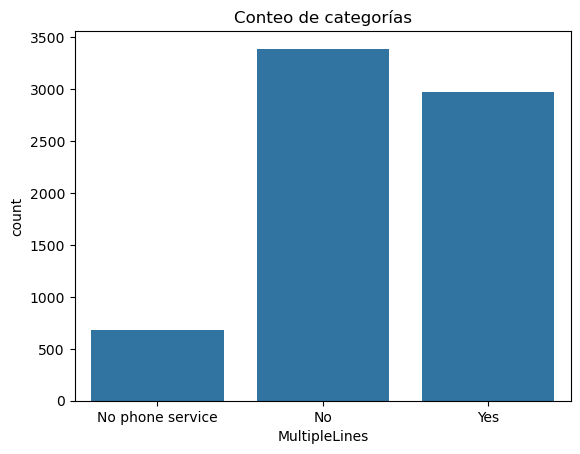

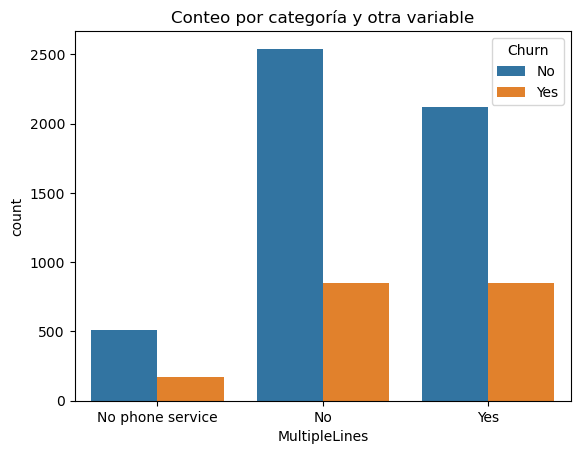

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [35]:
# 1. Frecuencias absolutas y relativas
freq = df_customer_churn['MultipleLines'].value_counts()
print(freq)
print(freq / len(df_customer_churn))

#2. Visualización de la distribución
plt





# 3. Visualización de la distribución
sns.countplot(x='MultipleLines', data=df_customer_churn)
plt.title('Conteo de categorías')
plt.show()

# 4. Gráfico de barras apiladas (si tienes otra variable categórica)
sns.countplot(x='MultipleLines', hue='Churn', data=df_customer_churn)
plt.title('Conteo por categoría y otra variable')
plt.show()

# 2. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df_customer_churn['MultipleLines'], df_customer_churn['Churn'])


**Análisis**

La variable MultipleLines indica si una persona tiene varias líneas dentro de su servicio. Esto puede provocar que si tiene varios servicios contratados sea probable que se quede con Telco.

Primero, identificamos los posibles valores que son No, Yes y No phone services. Se observa que el dataset está equilibrado entre Yes (42.1%) y No(48.1%), pero No pone services (9.6%) está subrepresentados.

Por ultimo, vamos la relación entre está variable y la variable objetivo (Churn) en una tabla donde observamos que la cantidad de los clientes que se quedan en la categoría de Yes es mayor (29%) que en las opciones de No(25%) y No phone services(29%)
